In [1]:
"""
Created on Friday 12th March 2021

@author: Aditya Asopa, Bhalla Lab, NCBS
"""
## Import libraries
import sys
import os
import EIDynamics
import imp
import pandas as pd
import pickle
from plotMaker import plotMaker

In [41]:
datafile = os.path.realpath('C:\\Users\\adity\\OneDrive\\NCBS\\Lab\\Projects\\EI_Dynamics\\Data\\21-04-02_G250\\cell1_copy\\2021_04_03_0004_rec.abf')
print(datafile)

C:\Users\adity\OneDrive\NCBS\Lab\Projects\EI_Dynamics\Data\21-04-02_G250\cell1_copy\2021_04_03_0004_rec.abf


In [42]:
#Get the path
# datafile = os.path.realpath(sys.argv[1])
exptDir = os.path.dirname(datafile)
exptFile = os.path.basename(datafile)
fileID = exptFile.split('_rec')[0]
epFile = exptDir + "\\" + fileID + "_ExperimentParameters.py"
epFile = os.path.abspath(epFile)

print(epFile)

C:\Users\adity\OneDrive\NCBS\Lab\Projects\EI_Dynamics\Data\21-04-02_G250\cell1_copy\2021_04_03_0004_ExperimentParameters.py


In [43]:
# Import Experiment Variables
try:
    print ("Looking for experiment parameters locally")
    eP = imp.load_source('ExptParams',epFile)
    print('Local parameters loaded')
except:
    print ("No special instructions, using default variables.")
    try:
        import ExperimentParameters_Default as eP
    except:
        print ("No analysis variable found!")

Looking for experiment parameters locally
Local parameters loaded


In [44]:
# importing stimulation coordinates
try:
    coordfile = exptDir + "\\" + fileID + "_coords.txt"
    os.path.isfile(coordfile)
    print('Loading local coord file')  
except:
    print('No coord file found, probably there isn\'t one')
    coordfile = ''

Loading local coord file


In [45]:
# Recording cell data and analyses
try:
    cellFile = exptDir + "\\" + "cell.pkl"    
    print('Loading local cell data from {}'.format(cellFile))
    cell.response = pd.read_pickle(cellFile)
except:
    print('Local cell data not found, creating new cell')
    cell = EIDynamics.Neuron(eP)

Loading local cell data from C:\Users\adity\OneDrive\NCBS\Lab\Projects\EI_Dynamics\Data\21-04-02_G250\cell1_copy\cell.pkl


In [46]:
cell.createExperiment(datafile=datafile,coordfile=coordfile,exptParams=eP)

Loading ABF file
Datafile has 24 sweeps in 5 channels: 
 Ch0: Cell, 
 Ch1: FrameTTL, 
 Ch2: Photodiode, 
 Time: Time Axis, 
 cmd: Ch0 Command Signal


In [47]:
cell.experiment

{'20Hz': <EIDynamics.Experiment at 0x166a5058688>,
 '30Hz': <EIDynamics.Experiment at 0x166a4d9cb88>,
 '50Hz': <EIDynamics.Experiment at 0x166a510eb48>}

In [48]:
len(cell.response)

96

In [49]:
resp = cell.response

In [50]:
resp.sample(10)

,Sweep,Repeat,Pattern,numSquares,Coords,Intensity,pulseWidth,StimFreq,EI,IR,...,10,11,12,13,14,15,16,firstPulseTime,AP,PeakResponse
11,11,2,C,5,"[205, 251, 297, 389, 447]",100,5,20,E,125.222778,...,12.70,13.00,12.90,14.75,15.30,15.15,15.35,12.80,True,110.948334
12,12,2,D,5,"[209, 247, 259, 301, 393]",100,2,20,E,132.850647,...,9.05,12.50,13.10,12.15,12.75,13.35,12.55,10.80,True,107.620667
20,20,3,D,5,"[209, 247, 259, 301, 393]",100,5,20,E,127.664185,...,9.90,15.10,15.85,16.60,13.35,14.10,15.00,11.45,True,109.646149
12,12,2,D,5,"[209, 247, 259, 301, 393]",100,2,50,E,83.024597,...,13.60,11.25,7.85,17.60,9.25,6.70,16.50,6.40,False,1.000946
4,4,1,D,5,"[209, 247, 259, 301, 393]",100,2,50,E,149.359131,...,9.65,11.90,10.65,10.85,11.35,10.45,0.00,10.50,True,101.866852
16,16,2,H,15,"[151, 163, 197, 201, 209, 213, 259, 301, 339, ...",100,2,50,E,136.978149,...,9.00,11.30,8.75,8.25,10.85,9.90,12.55,9.50,False,0.953461
5,5,1,E,5,"[251, 305, 343, 397, 451]",100,2,50,E,138.240051,...,9.75,13.80,0.00,10.95,13.30,14.05,13.95,8.85,True,99.039429
13,13,2,E,5,"[251, 305, 343, 397, 451]",100,2,50,E,87.609863,...,8.90,13.25,17.25,7.90,16.40,7.00,12.05,0.30,False,2.596523
21,21,3,E,5,"[251, 305, 343, 397, 451]",100,2,20,E,143.963623,...,12.10,15.85,13.35,18.55,15.65,13.90,12.60,9.40,True,104.442108
8,8,1,H,15,"[151, 163, 197, 201, 209, 213, 259, 301, 339, ...",100,2,50,E,120.079041,...,9.80,9.55,11.80,9.55,8.95,10.20,10.55,8.15,True,98.627991


In [51]:
with open(cellFile,"wb") as f:
    pickle.dump(resp, f)

C:\Users\adity\OneDrive\NCBS\Lab\Projects\EI_Dynamics\Data\21-04-02_G250\cell1_copy\cell.pkl


<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

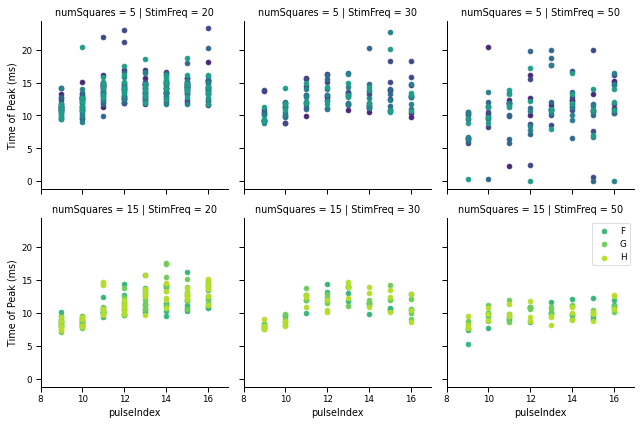

In [52]:
# Plots
print(cellFile)
plt.figure()
plotMaker(cellFile,ploty="peakTime",plotby="Pattern")

C:\Users\adity\OneDrive\NCBS\Lab\Projects\EI_Dynamics\Data\21-04-02_G250\cell1_copy\cell.pkl


<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

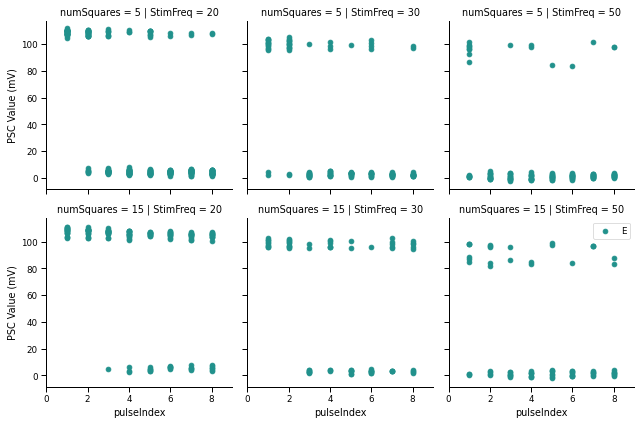

In [53]:
# Plots
print(cellFile)
plt.figure()
plotMaker(cellFile,ploty="peakRes",plotby="EI")